## Observations and Insights 

In [74]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "mouse_metadata.csv"
study_results_path = "study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#look at mouse_metadata and study results to decide what value/(s) to merge on. 
#mouse_metadata.head()
#study_results.head()
# Combine the data into a single dataset

merge_df = pd.merge(mouse_metadata, study_results, how = 'outer', on='Mouse ID')
# Display the data table for preview

merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
num_mice = merge_df["Mouse ID"].nunique()
num_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice = [merge_df.duplicated(["Mouse ID","Timepoint"])]
duplicate_mice

[0       False
 1       False
 2       False
 3       False
 4       False
         ...  
 1888    False
 1889    False
 1890    False
 1891    False
 1892    False
 Length: 1893, dtype: bool]

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

all_duplicates = merge_df[merge_df.duplicated(["Mouse ID"])]
all_duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = merge_df.drop_duplicates(subset="Mouse ID")
cleaned_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0


In [6]:
# Checking the number of mice in the clean DataFrame.
#Test. Count function should now return same value as nunique
new_num_mice = cleaned_df["Mouse ID"].count()
new_num_mice

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

summary_stats = merge_df.groupby(["Drug Regimen","Tumor Volume (mm3)"]).describe()
print(summary_stats)

                                Age_months                                    \
                                     count  mean std   min   25%   50%   75%   
Drug Regimen Tumor Volume (mm3)                                                
Capomulin    23.343598                 1.0   3.0 NaN   3.0   3.0   3.0   3.0   
             25.472143                 1.0   3.0 NaN   3.0   3.0   3.0   3.0   
             28.167397                 1.0  16.0 NaN  16.0  16.0  16.0  16.0   
             28.328531                 1.0   3.0 NaN   3.0   3.0   3.0   3.0   
             28.430964                 1.0  22.0 NaN  22.0  22.0  22.0  22.0   
...                                    ...   ...  ..   ...   ...   ...   ...   
Zoniferol    68.498639                 1.0  12.0 NaN  12.0  12.0  12.0  12.0   
             68.611061                 1.0   2.0 NaN   2.0   2.0   2.0   2.0   
             70.827796                 1.0  12.0 NaN  12.0  12.0  12.0  12.0   
             71.108118                 1

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

#Calculations
mean = merge_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
median = merge_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
variance = merge_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
s_d = merge_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
sem = merge_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()

#Show calculations in a dataframe
summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": s_d, "SEM": sem})
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

#Groupby drug regimen and count mice
bar_plot_df = pd.DataFrame(merge_df.groupby(["Drug Regimen"]).count()).reset_index()
bar_plot_df.head()
#Drop irrelevant columns

bar_df = bar_plot_df[["Drug Regimen", "Mouse ID"]]
bar_df = bar_df.set_index("Drug Regimen")
bar_df.head()


,Mouse ID
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186


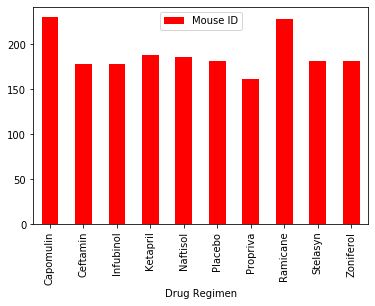

In [10]:
bar_df.plot(kind='bar', facecolor="red")

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

x_axis = np.arange(len(bar_df))
tick_locations = [value for value in x_axis]


In [12]:
merge_df["Drug Regimen"].unique()

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

Text(0, 0.5, 'Number Of Mice Using Each Regimen')

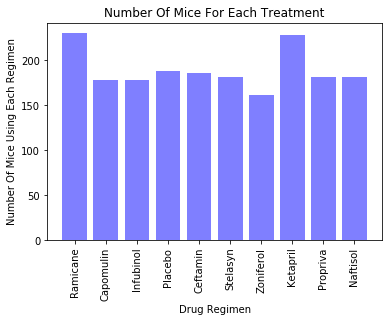

In [13]:
plt.bar(x_axis, bar_df["Mouse ID"], color='b', alpha=0.5, align='center')
plt.xticks(tick_locations, merge_df["Drug Regimen"].unique(), rotation="vertical")
plt.title("Number Of Mice For Each Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number Of Mice Using Each Regimen")

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender = pd.DataFrame(merge_df.groupby(['Sex']).count()).reset_index()
gender

,Sex,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Female,935,935,935,935,935,935,935
1,Male,958,958,958,958,958,958,958


In [15]:
gender_df = gender[["Sex", "Mouse ID"]]

count = gender["Mouse ID"].value_counts()
count
titles = ["Male", "Female"]
female = gender_df.iloc[0,1]
male = gender_df.iloc[1,1]
genders = [male, female]
colors = ["lightcoral", "lightskyblue"]
explode = (0, 0.05)

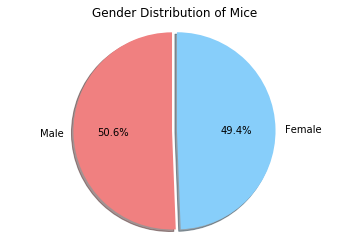

In [16]:
plt.title("Gender Distribution of Mice")
plt.pie(genders, explode=explode, labels=titles, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.show()

In [83]:
gender_df.head()

,Sex,Mouse ID
0,Female,935
1,Male,958


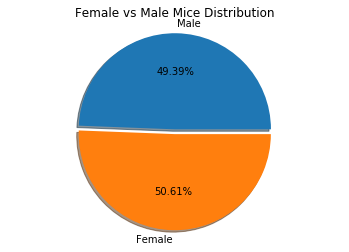

In [84]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = titles
sizes = gender_df["Mouse ID"]
plt.pie(sizes, explode=explode, labels=labels, autopct="%1.2f%%",shadow=True)
plt.axis("equal")
plt.title("Female vs Male Mice Distribution")
plt.show()

## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = merge_df.groupby('Mouse ID').agg(Timepoint=('Timepoint', 'max'))
greatest_timepoint = greatest_timepoint.reset_index()
#greatest_timepoint
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_tumor_df = pd.merge(greatest_timepoint, merge_df, on=['Mouse ID', 'Timepoint'])
max_tumor_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [19]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_list = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

vol_data = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

quartiles = max_tumor_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])

lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f'The lower quartile of tumor volume is {lowerq}')
print(f'The upper quartile of tumor volume is {upperq}')
print(f'The inter quartile range of tumor volume is {iqr}')

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5+iqr)
print(f" Values below {lower_bound} could be outliers")
print(f" Values above {upper_bound} could be outliers")

# Locate the rows which contain mice on each drug and get the tumor volumes
outliers = max_tumor_df.loc[(max_tumor_df['Tumor Volume (mm3)'] < lower_bound) | (max_tumor_df['Tumor Volume (mm3)'] > upper_bound)]    
#print(outliers)
#print("Outliers returned zero, therefore there are no outliers")
    

The lower quartile of tumor volume is 45.93471217
The upper quartile of tumor volume is 64.95756185
The inter quartile range of tumor volume is 19.022849680000007
 Values below 17.400437649999986 could be outliers
 Values above 85.48041153000001 could be outliers


In [20]:
for x in treatments_list:
    tumor_vol = max_tumor_df.loc[max_tumor_df['Drug Regimen'] == x, 'Tumor Volume (mm3)']
    vol_data.append(tumor_vol.values.tolist())
    
    new_outlier_table = [tumor for tumor in tumor_vol if tumor < lower_bound or tumor > upper_bound]
    print(f' Final tumor volume data points below {lower_bound} and above {upper_bound} could be outliers for {x}')
    print(f' There is {len(new_outlier_table)} potention outlier/s in the final tumour value for {x}')

 Final tumor volume data points below 17.400437649999986 and above 85.48041153000001 could be outliers for Capomulin
 There is 0 potention outlier/s in the final tumour value for Capomulin
 Final tumor volume data points below 17.400437649999986 and above 85.48041153000001 could be outliers for Ramicane
 There is 0 potention outlier/s in the final tumour value for Ramicane
 Final tumor volume data points below 17.400437649999986 and above 85.48041153000001 could be outliers for Infubinol
 There is 0 potention outlier/s in the final tumour value for Infubinol
 Final tumor volume data points below 17.400437649999986 and above 85.48041153000001 could be outliers for Ceftamin
 There is 0 potention outlier/s in the final tumour value for Ceftamin


In [21]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
box_plot_df = pd.DataFrame(vol_data)
box_plot_df = box_plot_df.transpose()
box_plot_df.columns = [treatments_list]
box_plot_df.head()

,Capomulin,Ramicane,Infubinol,Ceftamin
0,38.982878,38.407618,67.973419,62.999356
1,38.939633,43.047543,65.525743,45.000000
2,30.485985,38.810366,57.031862,56.057749
3,37.074024,32.978522,66.083066,55.742829
4,40.159220,38.342008,72.226731,48.722078


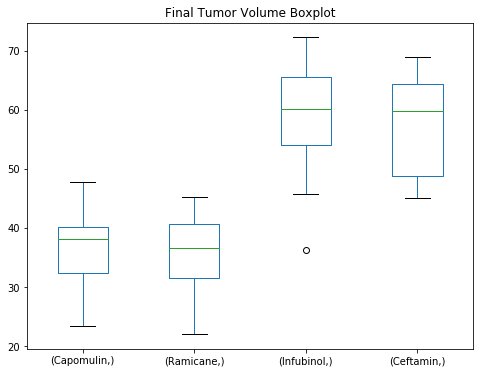

In [22]:
box_plot_df[['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']].plot(kind='box', title='Final Tumor Volume Boxplot', figsize=(8,6))

plt.show()

## Line and Scatter Plots

In [39]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

#merge_df.head()
#filter to find mouse with capomulin
cap_df = merge_df.loc[merge_df["Drug Regimen"] == "Capomulin"]

#cap_df.head()

#First capomulin mouse is s185
s185_df = cap_df.loc[cap_df["Mouse ID"] == "s185"]

#s185_df

#Remove irrelevant columns and make timepoint the index
time_vs_tumor_df = s185_df.set_index('Timepoint')
new_time_vs_tumor_df = time_vs_tumor_df[["Tumor Volume (mm3)"]]
new_time_vs_tumor_df



,Tumor Volume (mm3)
Timepoint,
0,45.000000
5,43.878496
10,37.614948
15,38.177232
20,36.866876
25,33.949940
30,32.959671
35,28.328531
40,25.472143


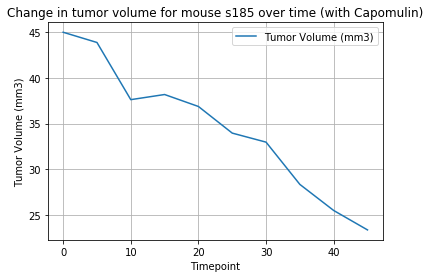

In [44]:
new_time_vs_tumor_df.plot()
plt.title("Change in tumor volume for mouse s185 over time (with Capomulin)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()

Text(0.5, 1.0, 'Mice Weight vs Average Tumor Volume (mm3)')

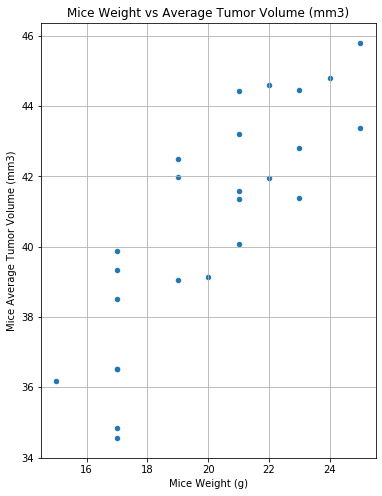

In [59]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
scatterplot_df = merge_df.loc[merge_df["Drug Regimen"] == "Capomulin"]

w_v_t_df = scatterplot_df.groupby('Mouse ID').agg(Weight=('Weight (g)', 'mean'), Avg_Tumor_Vol=('Tumor Volume (mm3)', 'mean'))
w_v_t_df

scatterplot = w_v_t_df.plot(kind="scatter", x="Weight", y="Avg_Tumor_Vol", grid=True, figsize=(6,8))
scatterplot.set_xlabel("Mice Weight (g)")
scatterplot.set_ylabel("Mice Average Tumor Volume (mm3)")
scatterplot.set_title("Mice Weight vs Average Tumor Volume (mm3)")

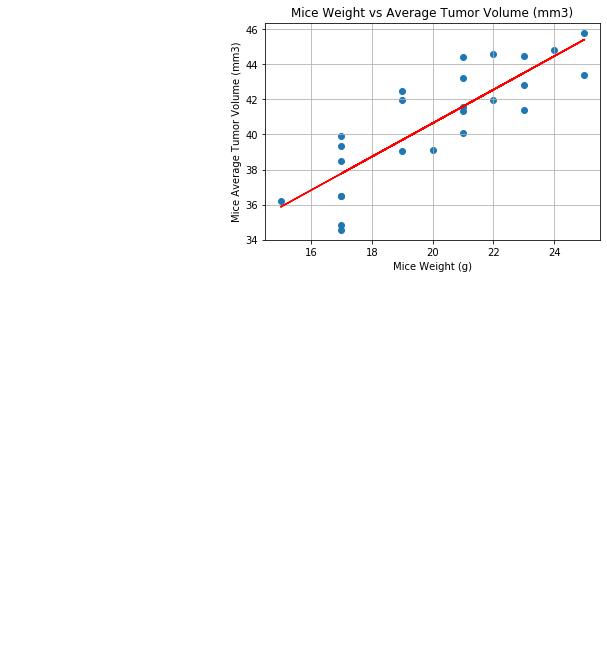

y= 0.95x + 21.55


In [82]:
# Calculate the correlation coefficient and linear regression model
weight = w_v_t_df["Weight"]
avg_tumor_vol = w_v_t_df["Avg_Tumor_Vol"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, avg_tumor_vol)
regress_values = weight * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight, avg_tumor_vol)
plt.plot(weight, regress_values, "r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Mice Weight (g)")
plt.ylabel("Mice Average Tumor Volume (mm3)")
plt.title("Mice Weight vs Average Tumor Volume (mm3)")
plt.grid()
plt.show()
print(line_eq)

## Correlation and Regression

In [70]:
 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(weight, avg_tumor_vol)
print(f"The correlation between weight and average tumor volume (mm3) is {round(correlation[0],2)}")

The correlation between weight and average tumor volume (mm3) is 0.84
